Hi,   

In this notebook, I will be exploring and analyzing the data provided for the Data Analyst take-home assessment from Fetch to demonstrate my ability to work with data, identify data quality issues, answer specific queries, and communicate findings to stakeholders. The analysis will be performed using Python and SQL, with visualizations to support key insights and conclusions. Throughout the exercise, I will document my assumptions and thought process clearly.   

Thank you for this opportunity.



# 1. Data Exploration and Quality Assessment

In this section, I will load and inspect the three datasets: *Products*, *Transactions*, and *Users*. I will assess data quality issues using Python and visualizations to identify patterns, missing values, duplicates, outliers, invalid values, and inconsistencies within each dataset.   

Initially, I considered creating a single `data_cleaning` function to handle and clean all the datasets. However, after exploring the data, I realized that each dataset presents different quality issues. As a result, I will clean each dataset individually to address its specific challenges.   

To preserve the integrity of the original data during the exploratory data analysis (EDA) process, I will create new dataframes for further analysis and visualization.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data (the csv files should be in the same directory as this script)
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
users = pd.read_csv('USER_TAKEHOME.csv')
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')

## 1-1 The Products Data

In [3]:
# Display the first 5 rows of the data to understand the structure
products.head(5)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [4]:
# understand the data types and missing values to prepare for data cleaning
print('Information about the products data:')
print(products.info())
print(' ')
print('Number of missing values in the products data:')
print(products.isnull().sum())

# number of unique values in each column
print(' ')
print('Number of unique values in each column:')
print(products.nunique())

# check for duplicates
print(' ')
print('Number of duplicates in the products data:')
print(products.duplicated().sum())

Information about the products data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
None
 
Number of missing values in the products data:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64
 
Number of unique values in each column:
CATEGORY_1          27
CATEGORY_2         121
CATEGORY_3         344
CATEGORY_4         127
MANUFACTURER      4354
BRAND             8

The *Products* data contains metadata for each product, including its category, manufacturer, brand, and barcode, which allows for further analysis in these areas. The `CATEGORY_1` to `CATEGORY_4` columns represent nested categories, organizing products into a hierarchical structure, with `CATEGORY_4` being the most specific subcategory. If a higher-level category does not have that many subcategories, the corresponding values will be left as NaN (missing).   

The `BARCODE` column is assumed to be the primary key that uniquely identifies each product. However, with 4,025 missing barcodes, this could pose challenges for accurate product analysis. There are also numerous null values across other columns, especially in the more specific categories (`CATEGORY_4`), which is expected since not all products have detailed subcategorization.   

In addition, the `BARCODE` column is incorrectly formatted in scientific notation after reading the csv file using Pandas library, requiring further data cleaning. While no obvious case sensitivity issues were observed during exploration, I will ensure that any hidden case sensitivity problems are addressed during data cleaning.   

Given that the barcode is assumed to be a unique identifier, rows with missing `BARCODE` will be removed. Although missing values in other columns (e.g. `MANUFACTURER` and `BRAND`) could affect the analysis, their impact is manageable and does not require the same treatment.

In [5]:
# list all nested categories
products.groupby(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']).count()

MANUFACTURER  \
CATEGORY_1     CATEGORY_2         CATEGORY_3     CATEGORY_4                                           
Alcohol        Beer               Ale            Stout Ale                                        4   
                                  Lager          American Lager                                 116   
                                                 Imported Lager                                   5   
               Wine               Red Wine       Cabernet Sauvignon                              14   
                                                 Malbec                                           3   
...                                                                                             ...   
Restaurant     Beverages          Soda           Regular Soda                                     1   
Snacks         Puffed Snacks      Popcorn        Already Popped Popcorn                        4234   
                                                 Microwave Popcorn                             1929   
                                                 Popcorn Kernels & Popcorn Seasonings           361   
Sporting Goods Exercise & Fitness Yoga & Pilates Yoga & Pilates Mats                             13   

                                                                                       BRAND  \
CATEGORY_1     CATEGORY_2         CATEGORY_3     CATEGORY_4                                    
Alcohol        Beer               Ale            Stout Ale                                 4   
                                  Lager          American Lager                          116   
                                                 Imported Lager                            5   
               Wine               Red Wine       Cabernet Sauvignon                       14   
                                                 Malbec                                    3   
...                                                                                      ...   
Restaurant     Beverages          Soda           Regular Soda                              1   
Snacks         Puffed Snacks      Popcorn        Already Popped Popcorn                 4234   
                                                 Microwave Popcorn                      1929   
                                                 Popcorn Kernels & Popcorn Seasonings    361   
Sporting Goods Exercise & Fitness Yoga & Pilates Yoga & Pilates Mats                      13   

                                                                                       BARCODE  
CATEGORY_1     CATEGORY_2         CATEGORY_3     CATEGORY_4                                     
Alcohol        Beer               Ale            Stout Ale                                   4  
                                  Lager          American Lager                            114  
                                                 Imported Lager                              5  
               Wine               Red Wine       Cabernet Sauvignon                         13  
                                                 Malbec                                      2  
...                                                                                        ...  
Restaurant     Beverages          Soda           Regular Soda                                0  
Snacks         Puffed Snacks      Popcorn        Already Popped Popcorn                   6956  
                                                 Microwave Popcorn                        2308  
                                                 Popcorn Kernels & Popcorn Seasonings      712  
Sporting Goods Exercise & Fitness Yoga & Pilates Yoga & Pilates Mats                        13  

[127 rows x 3 columns]

The table above displays the hierarchical structure of all categories from `CATEGORY_1` to `CATEGORY_4`, along with the counts for manufacturer, brand, and barcode at each level. This helps visualize how products are organized into nested categories and how values are distributed across the hierarchy. If inconsistencies occur in the counts for `MANUFACTURER`, `BRAND`, and `BARCODE`, it indicates the presence of null values in those columns at that specific category level.   

The following code provides a preliminary overview of the top 5 categories, manufacturers, and brands based on their product counts.

In [6]:
print('Top 5 categories: ')
print(products['CATEGORY_1'].value_counts().head(5))
print(' ')
print('Top 5 manufacturers: ')
print(products['MANUFACTURER'].value_counts().head(5))
print(' ')
print('Top 5 brands: ')
print(products['BRAND'].value_counts().head(5))

Top 5 categories: 
Health & Wellness        512695
Snacks                   324817
Beverages                  3990
Pantry                      871
Apparel & Accessories       846
Name: CATEGORY_1, dtype: int64
 
Top 5 manufacturers: 
PLACEHOLDER MANUFACTURER    86902
PROCTER & GAMBLE            21065
REM MANUFACTURER            20813
UNILEVER                    16864
L'OREAL                     16699
Name: MANUFACTURER, dtype: int64
 
Top 5 brands: 
REM BRAND          20813
BRAND NOT KNOWN    17025
PRIVATE LABEL      13467
CVS                 6400
SEGO                4831
Name: BRAND, dtype: int64


### Data Cleaning

In [7]:
# remove the rows with missing barcode based on the assumption that the barcode is unique identifier
products.dropna(subset=['BARCODE'], inplace=True)

# remove duplicates
products.drop_duplicates(inplace=True)

# remove scientific notation, and since the barcode is a unique identifier, convert it to string instead of int
products['BARCODE'] = products['BARCODE'].astype(int).astype(str)

# ensure there are no case sensitive issues
columns = ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER', 'BRAND']
for column in columns:
    products[column] = products[column].str.title()

# fill missing values in the MANUFACTURER and BRAND columns with 'Unknown'
# although those values are missing, they are not foreign keys, so the missing data is manageable and does not affect the integrity of the joins between the tables
products['MANUFACTURER'].fillna('Unknown', inplace=True)
products['BRAND'].fillna('Brand Not Known', inplace=True)

In [8]:
# check for the cleaned results
products.head(3)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,Unknown,Brand Not Known,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,Unknown,Brand Not Known,23278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,Placeholder Manufacturer,Elecsop,461817824225


### Visualization

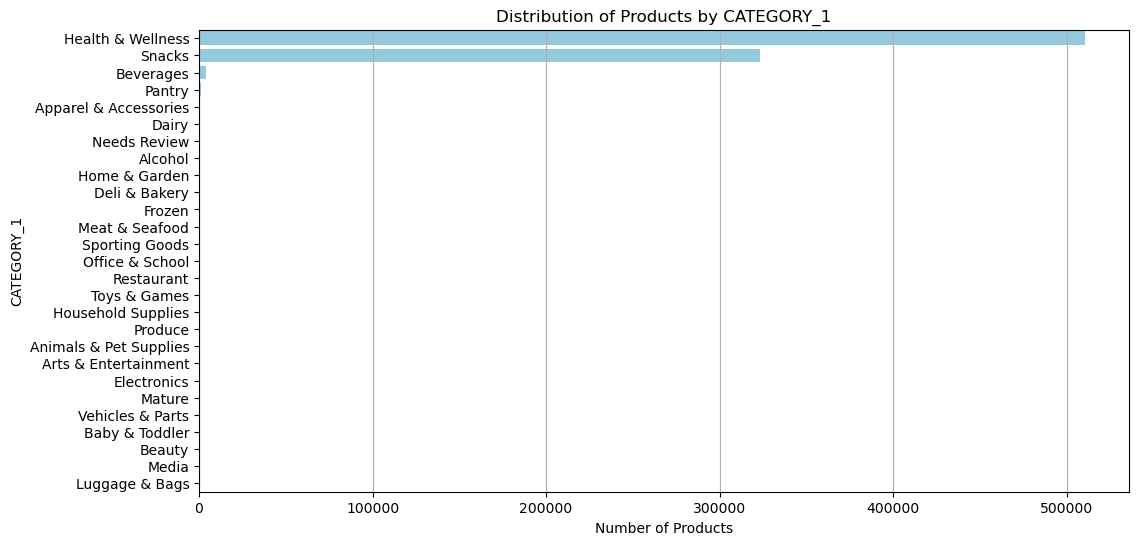

In [9]:
# category distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='CATEGORY_1', data=products, order=products['CATEGORY_1'].value_counts().index, color='skyblue')
plt.title('Distribution of Products by CATEGORY_1')
plt.xlabel('Number of Products')
plt.grid(axis='x')
plt.show()

This graph shows the dominance of Health & Wellness category and the strong presence of Snacks across *products* data, suggesting they are major focus areas or popular segments.   
This distribution gives insights into the popular categories and potentially underserved areas, and could be useful for marketing focus or identifying expansion opportunities.

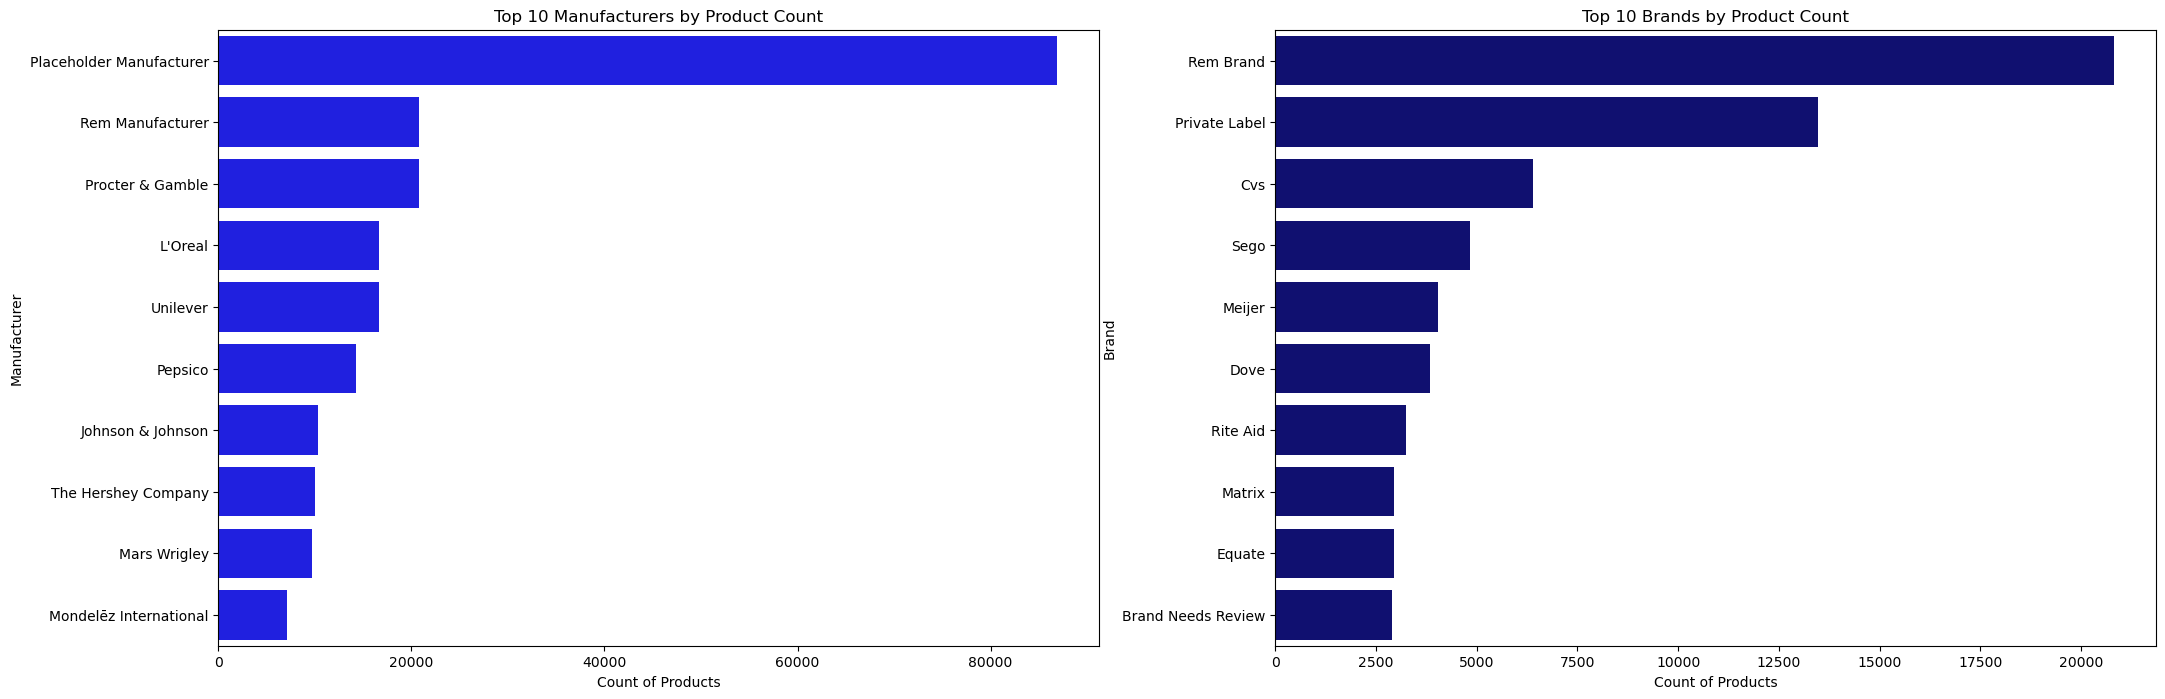

In [10]:
# a figure with two subplots: top 10 manufacturers and brands
plt.figure(figsize=(25, 8))

# the top 10 manufacturers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
top_manufacturers = products['MANUFACTURER'].value_counts().sort_values(ascending=False)[1:11]  # Exclude 'Unknown'
sns.barplot(y=top_manufacturers.index, x=top_manufacturers.values, color='blue')
plt.title('Top 10 Manufacturers by Product Count')
plt.xlabel('Count of Products')
plt.ylabel('Manufacturer')

# the top 10 brands
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
top_brands = products['BRAND'].value_counts().sort_values(ascending=False)[1:11]  # Exclude 'Brand Not Known'
sns.barplot(y=top_brands.index, x=top_brands.values, color='navy')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Count of Products')
plt.ylabel('Brand')

plt.show()


These two graphs provide insights into the top manufacturers and brands based on product count. Notably, Rem stands out as a highly advantageous company as it occupies both the top brand and top manufacturer positions. There's a notable drop-off in product count between the top 1-2 entries and the rest in both graphs, suggesting a long-tail distribution of products across manufacturers and brands. This information could be beneficial for Fetch's business relations and marketing strategies.

However, some intriguing names, such as 'Private Label', 'Brand Needs Review', and 'Placeholder Manufacturer', raise questions about their classification. It is unclear whether these are actual brand names (as some companies do like to choose quirky names!) or internal labels that require further data cleaning. For the purpose of this analysis, I will assume they represent valid values. A clearer understanding of these labels would enhance the accuracy of the analysis.

## 1-2 The Users Data

In [11]:
# Display the first 5 rows of the data to understand the structure
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [12]:
# understand the data types and missing values to prepare for data cleaning
print('Information about the users data:')
print(users.info())
print(' ')
print('Number of missing values in the users data:')
print(users.isnull().sum())
print(' ')
print('Number of duplicates in the users data:')
print(users.duplicated().sum())

Information about the users data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None
 
Number of missing values in the users data:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
 
Number of duplicates in the users data:
0


The *Users* data contains 100,000 U.S. user records, with the `ID` column serving as a primary key, which has no missing and duplicated values. The dataset includes key user-specific information, such as account creation dates, birth dates, state abbreviations, preferred language, and gender. This information allows for demographic analysis and segmentation based on factors like location, language preference, and age.   

However, there are significant missing values in the `BIRTH_DATE`, `STATE`, and `LANGUAGE` columns, which could affect the accuracy of demographic insights and need to be addressed. Additionally, the date format in the `BIRTH_DATE` and `CREATED_DATE` columns includes unnecessary details beyond the year, month, and day. I will clean these columns to extract only the relevant information for accurate analysis.   

While the `CREATED_DATE` column has no missing values and requires minimal cleaning, the `BIRTH_DATE` field presents a challenge due to missing data. In this analysis, I have chosen not to impute missing `BIRTH_DATE` values with averages or default placeholders. Imputation could distort age-related insights, particularly in scenarios where demographic segmentation relies on accurate age data. By leaving the `BIRTH_DATE` column as is, I preserve the integrity of the dataset, ensuring that any age-based analysis is only conducted on users with known birth dates. When performing age-related analysis, I will drop rows where `BIRTH_DATE` is missing to ensure that the analysis is both accurate and reflective of the available data. This approach avoids introducing potential bias or misleading results caused by assumptions or imputation.    

There is also inconsistency in the `LANGUAGE` column: "en" uses the shortest ISO 639 code for English, whereas "es-419" (Spanish for the Latin America and Caribbean region) uses a UN M.49 region code. To ensure consistency, it would be preferable to standardize all language codes, with "es" being the correct ISO 639 code for Spanish. In addition, in the `GENDER` column, there is a case sensitivity issue (e.g., '"prefer" vs. "Prefer"). Standardizing these values and replacing null entries with "unknown" will help improve data quality.

### Data Cleaning

In [13]:
# understand the values contained in the columns to prepare for data cleaning
print(users['LANGUAGE'].unique())
print(users['GENDER'].unique())

['es-419' 'en' nan]
['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']


In [14]:
# convert to datetime format
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], format='%Y-%m-%d').dt.date
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], format='%Y-%m-%d').dt.date

# unify the language code and replace Nan with 'unknown'
users['LANGUAGE'] = users['LANGUAGE'].replace('es-419', 'es')
users['LANGUAGE'].fillna('unknown', inplace=True)

# gender column: unify 'prefer_not_to_say' and 'Prefer not to say', 'non_binary' and 'Non-Binary', 'not_listed' and 'My gender isn't listed', and replace Nan with 'unknown'
gender_dict = {'Prefer not to say': 'prefer_not_to_say', 'Non-Binary': 'non_binary', "My gender isn't listed": 'not_listed', np.nan: 'unknown'}
# replace the values following the dictionary
users['GENDER'] = users['GENDER'].replace(gender_dict)

# fill missing values in the STATE column with 'Unknown'
users['STATE'].fillna('Unknown', inplace=True)

In [15]:
# check for the data after cleaning
users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24,2000-08-11,CA,es,female
1,5ff220d383fcfc12622b96bc,2021-01-03,2001-09-24,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31,1994-10-28,FL,es,female
3,658a306e99b40f103b63ccf8,2023-12-26,NaT,NC,en,unknown
4,653cf5d6a225ea102b7ecdc2,2023-10-28,1972-03-19,PA,en,female


### Visualization

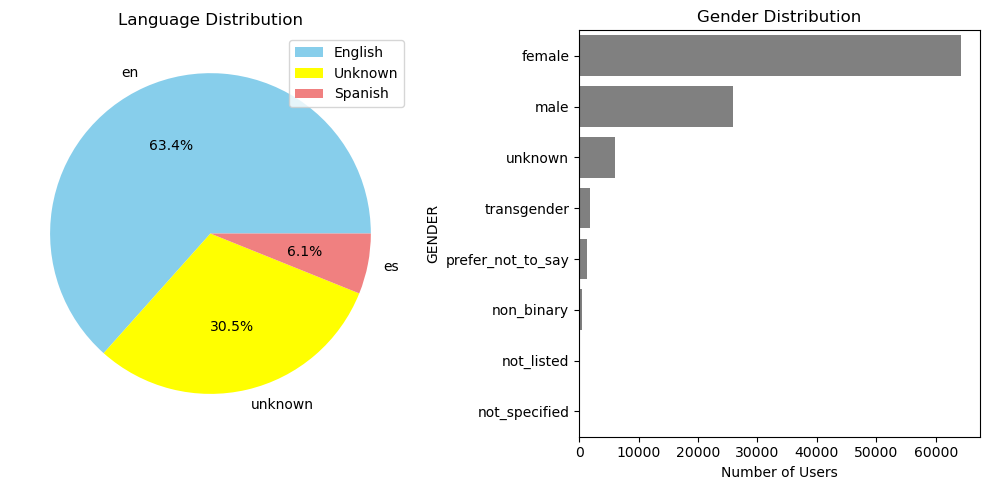

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for language distribution
axes[0].pie(users['LANGUAGE'].value_counts(dropna=False), 
            labels=users['LANGUAGE'].value_counts(dropna=False).index, 
            autopct='%1.1f%%', colors=['skyblue', 'yellow', 'lightcoral'])
axes[0].legend(['English', 'Unknown', 'Spanish'])
axes[0].set_title('Language Distribution')

# Countplot for gender distribution
sns.countplot(y='GENDER', data=users, 
              order=users['GENDER'].value_counts().index, 
              color='gray', ax=axes[1])
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Number of Users')

plt.tight_layout()
plt.show()

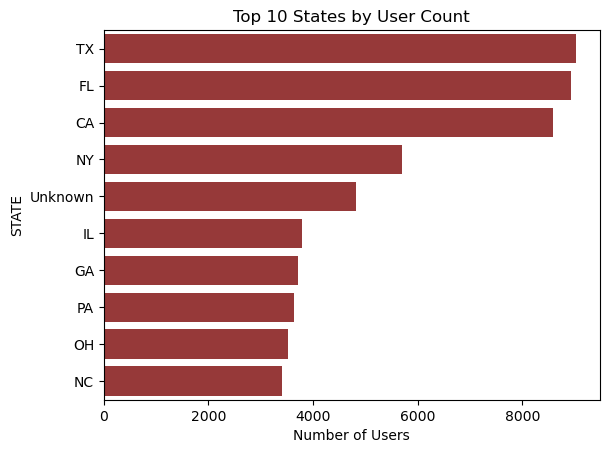

In [17]:
# top 10 states by user count
plt.plot(figsize=(100, 50))
sns.countplot(y='STATE', data=users, order=users['STATE'].value_counts().index[:10], color='brown')
plt.title('Top 10 States by User Count')
plt.xlabel('Number of Users')
plt.show()

The three graphs above all show distributions of different focus: `LANGUAGE`, `GENDER`, and `STATE`.   
Some quick facts are:
* The users appear to be primarily English-focused
* There's a clear female majority in users
* Texas, Flordia, and California are the states with the most users   

This could reflect the nature of the product (e.g., it might be more appealing to or targeted at women). These insights could be valuable for tailoring marketing strategies and product development.
   
The three columns share the same data quality issues: All three graphs show significant "unknown" data, leading to potential incorrect analysis.

In [18]:
# create new dataframe and columns for EDA purpose
users_eda = users[['ID', 'CREATED_DATE', 'BIRTH_DATE']] # avoid changing the original data
users_eda['CREATED_YEAR'] = users_eda['CREATED_DATE'].astype(str).str[:4].astype(int) # extract the year from the date
users_eda['CREATED_MONTH'] = users_eda['CREATED_DATE'].astype(str).str[5:7].astype(int) # extract the month from the date

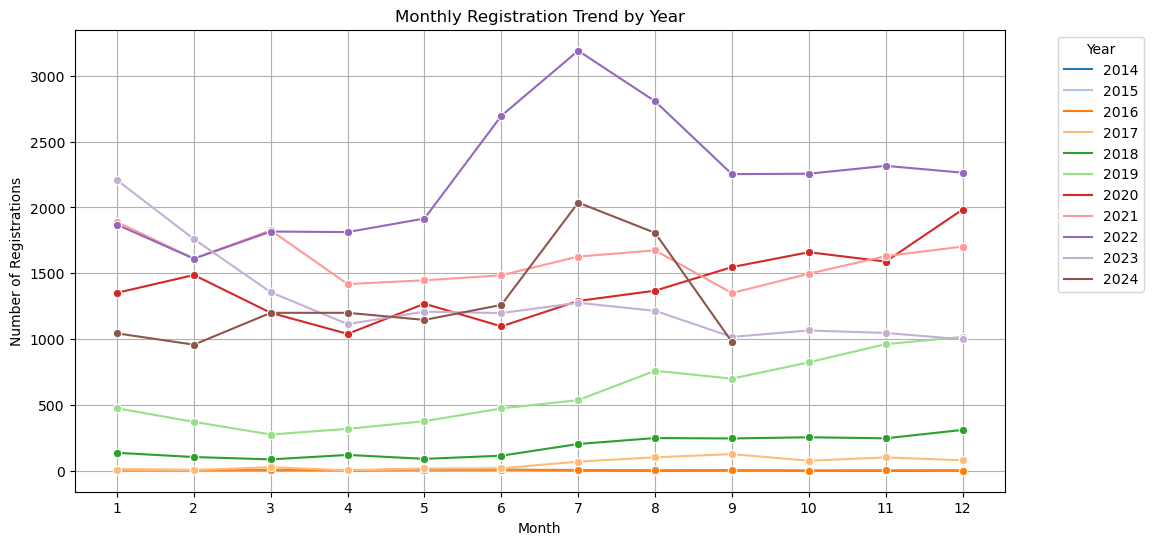

In [19]:
# visualize the distribution of users created over the months and years
created_trend = users_eda.groupby(['CREATED_YEAR', 'CREATED_MONTH'])['ID'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='CREATED_MONTH', y='ID', hue='CREATED_YEAR', data=created_trend, marker='o', palette='tab20')
plt.title('Monthly Registration Trend by Year')
plt.xlabel('Month')
plt.ylabel('Number of Registrations')
plt.xticks(range(1, 13))
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True)
plt.show()

This graph illustrates monthly registration trends from 2014 to September 2024. Here are the key insights:

1. Overall Growth: Each subsequent year generally shows higher registration numbers than the previous one, indicating consistent growth. Recent years (2020-2023) demonstrate significantly higher registration volumes compared to earlier years.

2. Seasonal Patterns: Most years show a peak in registrations around the middle of the year (month 6-8), suggesting a seasonal trend. This could be related to summer promotions or other cyclical factors.

3. End-of-Year Trend: Many years show an uptick in registrations towards the end of the year (month 11-12), possibly due to holiday-related promotions.

These insights indicate a growing user base with seasonal fluctuations. The strong growth in recent years points to a positive trajectory for the company, while the consistent seasonal patterns could guide marketing strategies and resource planning throughout the year.

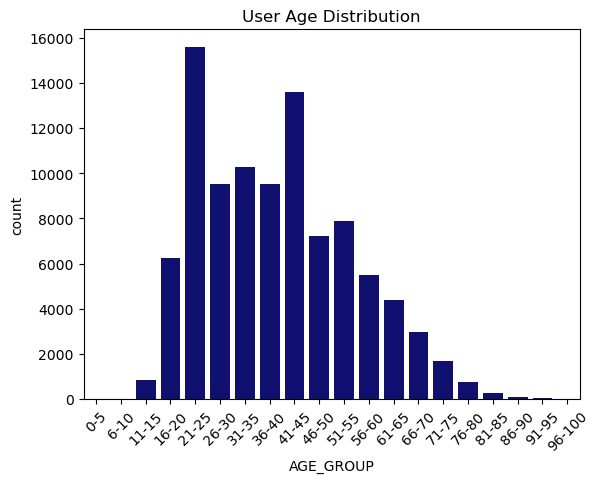

In [20]:
# age distribution
users_eda['AGE'] = (pd.to_datetime('today').tz_localize(None) - pd.to_datetime(users_eda['BIRTH_DATE']).dt.tz_localize(None)).astype('<m8[Y]')

# create bins for ages to enhance readability 
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100']
users_eda['AGE_GROUP'] = pd.cut(users_eda['AGE'], bins=bins, labels=labels)

plt.plot(figsize=(20, 15))
sns.countplot(x='AGE_GROUP', data=users_eda, color='navy')
plt.title('User Age Distribution')
plt.xticks(rotation=45)
plt.show()

The distribution shows a strong concentration of users in the young adult age range (21-25), with the majority falling between 21-45 years old. There is a gradual decline in user numbers as age increases. The lower numbers in both youth and senior age groups highlight potential opportunities for targeted marketing or product features to attract these demographics. These insights can help ensure the user experience caters to the dominant age groups while remaining inclusive.
   
This age distribution, combined with the previous graphs on geographic, language, and gender distribution, provides a comprehensive view of the user base demographics.

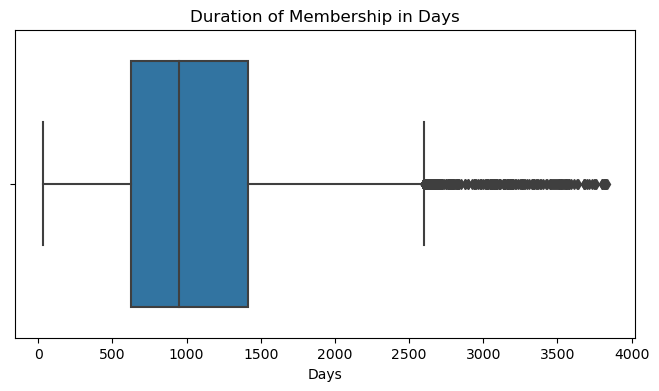

In [21]:
# duration of membership
users_eda['REGISTRATION_DURATION'] = (pd.to_datetime('today').tz_localize(None) - pd.to_datetime(users_eda['CREATED_DATE'])).dt.days
# because months have varying lengths (e.g., February has 28 or 29 days, while other months have 30 or 31 days), we will use days for the duration

plt.figure(figsize=(8, 4))
sns.boxplot(users_eda['REGISTRATION_DURATION'])
plt.xlabel('Days')
plt.title('Duration of Membership in Days')
plt.show()

This graph illustrates the distribution of membership durations in days (how long have them been a Fetch member). The vertical line inside the box marks the median registration duration, which appears to be around 3 years (approximately 1,000 days). Most users have been registered with the app for 2 to 4 years (700-1,400 days), consistent with the trends observed in the registration trend data.   
The distribution is right-skewed, indicating a long tail of users with longer registration durations. The numerous outliers on the right side represent early adopters of Fetch, those who registered between 2014 and 2018.

## 1-3 The Transactions Data

In [22]:
# Display the first 5 rows of the data to understand the structure
transactions.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [23]:
# understand the data types and missing values to prepare for data cleaning
print('Information about the transactions data: ')
print(transactions.info())
print(' ')
print('Number of missing values in the transactions data: ')
print(transactions.isnull().sum())
print(' ')
print('Number of duplicates in the transactions data: ')
print(transactions.duplicated().sum())

Information about the transactions data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
None
 
Number of missing values in the transactions data: 
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
 
Number of duplicates in the transactions data: 
171


In [24]:
# understand the values contained in the column
transactions['FINAL_QUANTITY'].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

In [25]:
# understand the values contained in the column
transactions['FINAL_SALE'].unique()

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

The *transactions* dataset contains 50,000 entries, recording various aspects of user transactions. The columns `RECEIPT_ID`, `USER_ID`, and `BARCODE` together serve as a composite primary key, as these three fields uniquely identify a specific transaction row. A single `RECEIPT_ID` can appear multiple times since a single receipt often involves multiple items (represented by the `BARCODE`). Additionally, `BARCODE` and `USER_ID` function are foreign keys, linking the transactions data to the product and user datasets respectively. As a result, the 5,000+ missing values in the `BARCODE` column present a significant issue, as it could impede the ability to connect the transactions to the correct products. I'd recommend dropping the rows with missing `BARCODE` to maintain the integrity of the product associations and ensure accurate analysis.
   
There are 171 duplicate entries in the dataset that need to be removed to prevent skewed results. Regarding data types, `PURCHASE_DATE` uses the desired format, while `SCAN_DATE` unnecessarily includes time, which can be simplified to only show the date. The consistence format between `PURCHASE_DATE` and `SCAN_DATE` would also allow further analysis. 

Additionally, both `FINAL_QUANTITY` and `FINAL_SALE` are stored as object types, although they should be numeric (float). While there are no missing values in these columns, there are data quality issues: "zero" values instead of "0" in `FINAL_QUANTITY` and blank spaces in `FINAL_SALE`, both of which require data cleaning to ensure consistency and accuracy.

Some columns in the dataset are unclear:
* **FINAL_QUANTITY**: The title suggests this column represents the quantity of items sold in the transaction. However, there are many decimal values, which is unusual because items are generally sold in whole units. This suggests that `FINAL_QUANTITY` might represent something other than the number of units sold, possibly a weighted quantity (e.g., kilograms or liters) for certain products.
* **FINAL_SALE**: Initially, I assumed this column represented the final price the item was sold for. However, the presence of numerous empty values raises doubts.   

To figure out what these two columns represent, I will conduct further analysis after data is cleaned.

Finally, based on the logic of earning Fetch rewards, the `SCAN_DATE` should either match the `PURCHASE_DATE` or occur later, as the `PURCHASE_DATE` indicates when the purchase took place and users can only scan the receipt afterward.

In [26]:
print('Number of rows with SCAN_DATE prior to PURCHASE_DATE:')
print(len(transactions[pd.to_datetime(transactions['PURCHASE_DATE']) > pd.to_datetime(transactions['SCAN_DATE']).dt.date]))

Number of rows with SCAN_DATE prior to PURCHASE_DATE:
94


Clearly, rows where the `SCAN_DATE` occurs before the `PURCHASE_DATE` likely indicate data entry errors. I will remove any rows where the `SCAN_DATE` is earlier than the `PURCHASE_DATE`. The variance in the number of days between the `PURCHASE_DATE` and the `SCAN_DATE` can be attributed to user behavior.

### Data Cleaning

In [27]:
# convert to datetime format
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], format='%Y-%m-%d %H:%M:%S')

# drop duplicates
transactions.drop_duplicates(inplace=True)

# drop rows with missing values in the barcode column
transactions.dropna(subset=['BARCODE'], inplace=True)

# remove rows with SCAN_DATE prior to PURCHASE_DATE
transactions = transactions[pd.to_datetime(transactions['PURCHASE_DATE']) <= transactions['SCAN_DATE'].dt.date]

# avoid case sensitive issues
transactions['STORE_NAME'] = transactions['STORE_NAME'].str.title()

# replace 'zero' to 0 in final_quantity and convert others from string to float
transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].replace('zero', '0')
transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].astype(float)

# replace ' ' to 0 in final_sale and convert others to numeric
transactions['FINAL_SALE'] = transactions['FINAL_SALE'].replace(' ', '0')
transactions['FINAL_SALE'] = transactions['FINAL_SALE'].astype(float)

# remove scientific notation in the barcode column
transactions['BARCODE'] = transactions['BARCODE'].astype(int).astype(str)

In [28]:
# check the data after cleaning
transactions.head(3)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,Walmart,63b73a7f3d310dceeabd4758,15300014978,1.0,0.00
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,Walmart,60842f207ac8b7729e472020,78742229751,1.0,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,Food Lion,63fcd7cea4f8442c3386b589,783399746536,0.0,3.49


To continue exploring what `FINAL_QUANTITY` and `FINAL_SALE` represent, I used the following code to know the rows of presence of each scenario:

In [29]:
print('Both FINAL_QUANTITY and FINAL_SALE columns are 0.0: ', 
      len(transactions[(transactions['FINAL_QUANTITY'] == 0.0) & (transactions['FINAL_SALE'] == 0.0)]))
print('Both FINAL_QUANTITY and FINAL_SALE columns are valid numbers: ', 
      len(transactions[(transactions['FINAL_QUANTITY'] != 0.0) & (transactions['FINAL_SALE'] != 0.0)]))
print('Only FINAL_QUANTITY column is 0.0: ', 
      len(transactions[(transactions['FINAL_QUANTITY'] == 0.0) & (transactions['FINAL_SALE'] != 0.0)]))
print('Only FINAL_SALE column is 0.0: ', 
      len(transactions[(transactions['FINAL_QUANTITY'] != 0.0) & (transactions['FINAL_SALE'] == 0.0)]))

Both FINAL_QUANTITY and FINAL_SALE columns are 0.0:  57
Both FINAL_QUANTITY and FINAL_SALE columns are valid numbers:  21835
Only FINAL_QUANTITY column is 0.0:  10981
Only FINAL_SALE column is 0.0:  11127


The cases where both `FINAL_QUANTITY` and `FINAL_SALE` are 0.0 are rare and likely represent incomplete transactions or data entry errors, as it doesn't make sense for both fields to be zero. As a result, I will remove these rows during data cleaning. On the other hand, rows where both `FINAL_QUANTITY` and `FINAL_SALE` are valid represent normal transactions.
   
After exploring how Fetch App displays the scanned receipt, for rows where only one of the two columns contains a valid value, my assumptions are as follows:

* ***Valid FINAL_QUANTITY but FINAL_SALE is 0.0***: This might indicate gifts or promotions, where the product was given to the customer but no money was charged.
* ***Valid FINAL_SALE but FINAL_QUANTITY is 0.0***: Since there are no rows with negative `FINAL_SALE` to indicate a return, I assume this represents returns. In this scenario, the sale amount (`FINAL_SALE`) reflects the refund, but the quantity (`FINAL_QUANTITY`) is set to zero as no items were given out. This assumption aligns with the possibility that Fetch Rewards is more concerned with how much a customer spends on a brand rather than the quantity of products purchased.

In [30]:
# drop rows with both FINAL_QUANTITY and FINAL_SALE are 0
both_zero = transactions[(transactions['FINAL_QUANTITY'] == 0.0) & (transactions['FINAL_SALE'] == 0.0)].index
transactions.drop(both_zero, inplace=True)

### Visualization

In [31]:
# create new dataframe and columns for EDA purpose
transcations_trend = transactions[['RECEIPT_ID', 'SCAN_DATE']]
transcations_trend['YEAR'] = transcations_trend['SCAN_DATE'].dt.year
transcations_trend['MONTH'] = transcations_trend['SCAN_DATE'].dt.month

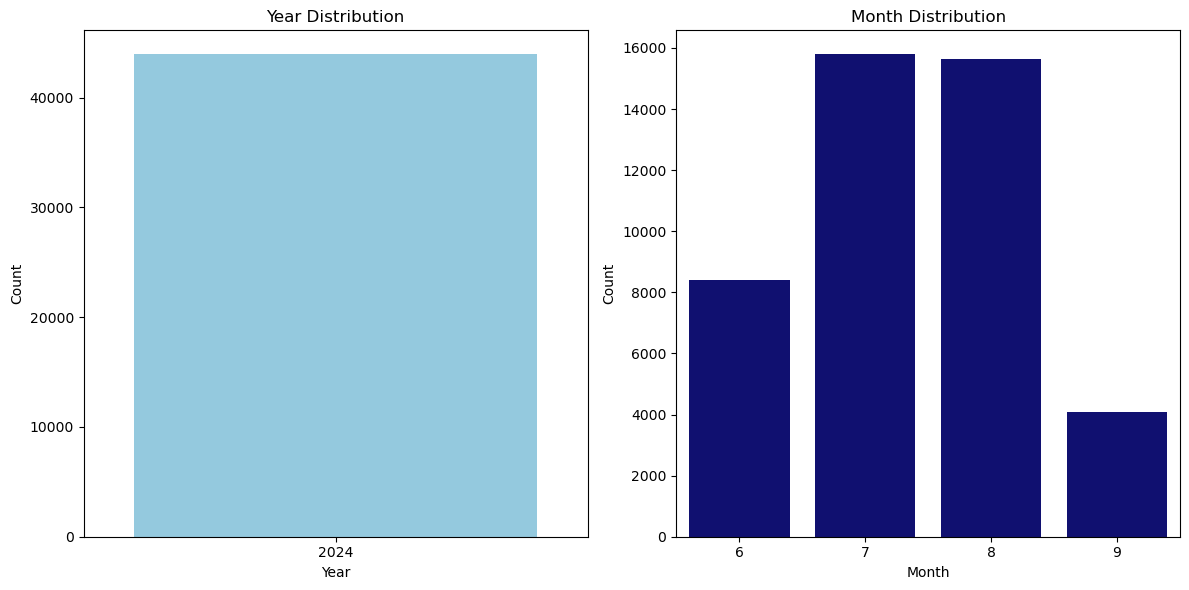

In [32]:
plt.figure(figsize=(12, 6))

# First subplot for the YEAR countplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.countplot(x='YEAR', data=transcations_trend, color='skyblue')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')

# Second subplot for the MONTH countplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.countplot(x='MONTH', data=transcations_trend, color='navy')
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

These visualizations intuitively show that all transactions occurred between June and September 2024.

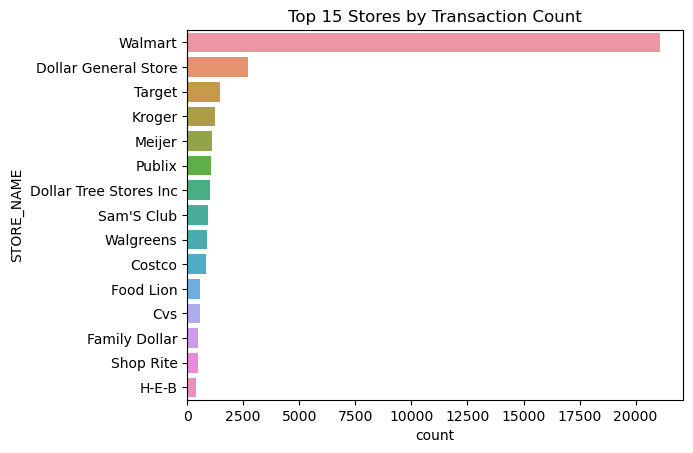

In [33]:
# top 15 stores by transaction count
sns.countplot(y='STORE_NAME', data=transactions, order=transactions['STORE_NAME'].value_counts().head(15).index)
plt.title('Top 15 Stores by Transaction Count')
plt.show()

This graph shows the top 15 stores by row (transaction) count. Walmart is overwhelmingly the store with the most transactions, with a count nearly eight times higher than the next competitor. This suggests Walmart is the primary shopping destination for a large portion of the user base. The second and third most frequent stores are Dollar General and Aldi, both known for their low prices, indicating a strong user preference for discount stores.   
Additionally, many of the top stores (Aldi, Kroger, etc.) have a strong focus on food items, indicating that grocery shopping is a primary use case. These findings suggest that the user base of Fetch might heavily focused on value shopping and everyday household items and grogeries.   
The data could be valuable for understanding shopping patterns, planning partnerships or promotions, and tailoring promotions across different types of retail environments.

## 1-4 Summary of the Data Quality & Assumption

The three datasets, *products*, *users*, and *transactions*, offer a comprehensive view of user demographic, product details, and sales interactions. After exploring these datasets, it is clear that cleaning and standardization are required to ensure reliable analysis. Additionally, there are several data quality issues and some fields that are challenging to interpret:

#### Data Quality Issues:
- **Missing Values**:  
  Missing values in non-critical columns may not affect the overall analysis, as they can be handled by assigning default values or dropping them based on the context. However, missing values in primary or foreign keys are more problematic as they impede proper linkage across datasets, leading to incomplete or inaccurate insights.  

- **Duplicates**:  
  The *transactions* data contains 171 duplicate entries and the *products* data has 215 duplicates that need to be removed to avoid skewing results.  

- **Inconsistent Data Formatting**:  
  Some columns store date data as datetime format, while others are stored as objects. Additionally, there are inconsistent language codes (a mix of ISO 639 and UN M.49), case sensitivity issues in the `GENDER` column, and numeric decimal values stored as strings, all of which require standardization to ensure accurate statistical analysis.

#### Challenging Fields:
Several fields across the datasets are challenging to understand, particularly `FINAL_QUANTITY` and `FINAL_SALE`. These column titles are not intuitive and the values they contain require significant time to explore and understand. Misinterpreting them could result in inaccurate analysis.

#### Conclusion:
The datasets provide valuable insights into products, users, and transactions; however, data quality issues like missing values, duplicates, inconsistent formatting, and unclear column definitions must be addressed through data cleaning and preprocessing. Clear documentation of each field would significantly enhance the quality of the analysis.

# 2. Answering the Queries
In this section, I will address the questions by first thoroughly consider the purpose of the queries, and create a new dataframe with the necessary columns and calculations added to ensure a comprehensive analysis after reviewing all the questions. 
   
The choice of using Python or SQL will depend on which tool is more intuitive and efficient for the specific task. Python will be employed for tasks requiring advanced data manipulation, new column creation, complex calculations, or visualizations, while SQL will be used for querying and filtering data directly from the tables when it provides a more straightforward solution.

### Data Preprocessing

In [34]:
from sqlalchemy import create_engine

# Create an in-memory SQLite database
engine = create_engine('sqlite://', echo=False)

In [35]:
# first, add the new columns before merging all dataframes
# create the age column. rows with missing birth date will have missing age
users['AGE'] = (pd.to_datetime('today').tz_localize(None) - pd.to_datetime(users['BIRTH_DATE']).dt.tz_localize(None)).astype('<m8[Y]')

# create the registration duration column
# because months have varying lengths, I will use days for the duration
users['REGISTERED_DAYS'] = (pd.to_datetime('today').tz_localize(None) - pd.to_datetime(users_eda['CREATED_DATE'])).dt.days

# create user generation (assumption: generation is based on birth year)
    # generation: 
    # Generation Alpha (born 2013-2025),
    # Gen Z (born 1997-2012), 
    # Millennials (born 1981-1996), 
    # Gen X (born 1965-1980), 
    # Baby Boomers (born 1946-1964), 
    # Silent Generation (born 1925-1945)
    # The Greatest Generation (born 1901-1924)
    # reference: https://libguides.usc.edu/busdem/age
users['USER_GENERATION'] = pd.cut(users['BIRTH_DATE'].dropna().astype(str).str[:4].astype(int), 
                                  bins=[1900, 1924, 1945, 1964, 1980, 1996, 2012, 2015], 
                                  labels=['The Greatest Generation', 'Silent Generation', 'Baby Boomers', 'Gen X', 'Millennials', 'Gen Z', 'Generation Alpha'])

users.head(3)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,REGISTERED_DAYS,USER_GENERATION
0,5ef3b4f17053ab141787697d,2020-06-24,2000-08-11,CA,es,female,24.0,1573,Gen Z
1,5ff220d383fcfc12622b96bc,2021-01-03,2001-09-24,PA,en,female,23.0,1380,Gen Z
2,6477950aa55bb77a0e27ee10,2023-05-31,1994-10-28,FL,es,female,29.0,502,Millennials


In [36]:
# Load DataFrames into the SQLite database
products.to_sql('Products', con=engine, index=False, if_exists='replace')
transactions.to_sql('Transactions', con=engine, index=False, if_exists='replace')
users.to_sql('Users', con=engine, index=False, if_exists='replace')

100000

In [37]:
# join data while avoiding duplicated and unnecessary columns
joint_query = '''
SELECT t.RECEIPT_ID, t.PURCHASE_DATE, t.SCAN_DATE, t. STORE_NAME, t.FINAL_QUANTITY, t.FINAL_SALE, 
    p.CATEGORY_1, p.CATEGORY_2, p.CATEGORY_3, p.CATEGORY_4, p.MANUFACTURER, p.BRAND, p.BARCODE, 
    u.ID AS USER_ID, u.CREATED_DATE, u.BIRTH_DATE, u.STATE, u.LANGUAGE, u.GENDER, u.AGE, u.REGISTERED_DAYS, u.USER_GENERATION
FROM transactions t
JOIN Products p
ON p.BARCODE = t.BARCODE
JOIN users u
ON u.ID = t.USER_ID
'''

# turn the query result into a DataFrame
joint_df = pd.read_sql(joint_query, con=engine)
joint_df.to_sql('JointData', con=engine, index=False, if_exists='replace')
joint_df.head(5)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,...,BARCODE,USER_ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,REGISTERED_DAYS,USER_GENERATION
0,00729da3-2564-4616-a4ea-7426232d52e8,2024-08-30,2024-09-03 13:00:21.972000,Family Dollar,1.0,0.00,Snacks,Candy,Chocolate Candy,None,...,34000080113,62e5a95ca6565cf0534c989c,2022-07-30,1961-07-21,FL,en,female,63.0,807,Baby Boomers
1,00ad12b5-a990-4f56-b7d8-78a506c36529,2024-08-18,2024-08-18 16:22:58.531000,7-Eleven,0.0,2.39,Snacks,Candy,Confection Candy,None,...,40000001607,610a8541ca1fab5b417b5d33,2021-08-04,1977-01-12,NY,en,male,47.0,1167,Gen X
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681000,Meijer,0.0,2.49,Snacks,Snack Cakes,Rice Treats,None,...,41250087700,646bdaa67a342372c857b958,2023-05-22,1981-03-23,WI,en,female,43.0,511,Millennials
3,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,2024-06-28,2024-06-28 09:59:19.953000,Publix,1.0,0.00,Snacks,Snack Cakes,Cakes & Truffles Snack Cakes,None,...,72030000350,647281efa55bb77a0e26f586,2023-05-27,1960-06-13,FL,en,male,64.0,506,Baby Boomers
4,04359032-f079-4fa3-b02d-0f97348b8f11,2024-08-29,2024-08-30 17:33:49.374000,Family Dollar,0.0,1.25,Snacks,Candy,Confection Candy,None,...,79200048563,6528a0a388a3a884364d94dc,2023-10-13,1988-06-30,WV,en,female,36.0,367,Millennials


In [38]:
# check how much data is available after merging
print(f'{products.shape[0]} rows in the products data after cleaning')
print(f'{users.shape[0]} rows in the users data after cleaning')
print(f'{transactions.shape[0]} rows in the transactions data after cleaning')
print(' ')
print(f'{joint_df.shape[0]} rows in the joint data after merging')

841369 rows in the products data after cleaning
100000 rows in the users data after cleaning
43943 rows in the transactions data after cleaning
 
144 rows in the joint data after merging


The three original datasets contain a large number of rows, so why does the joined data only have 144 rows? This significant loss of data could lead to major problems in the analysis. While a more flexible join, like a left or outer join, could retain more data, it may introduce issues for future analysis by including unmatched rows and missing values; as a result, I'll stay with using inner join.
   
To investigate the cause of the data loss, I used the following steps to identify where things went wrong:

In [39]:
# first check joining the transactions and products data
print('Joining transactions and products data: ')
print(pd.read_sql('SELECT COUNT(*) FROM transactions t JOIN Products p ON p.BARCODE = t.BARCODE', con=engine))
print(' ')

# then check joining the transactions and users data
print('Joining transactions and users data: ')
print(pd.read_sql('SELECT COUNT(*) FROM transactions t JOIN users u ON u.ID = t.USER_ID', con=engine))

Joining transactions and products data: 
   COUNT(*)
0     24665
 
Joining transactions and users data: 
   COUNT(*)
0       238


It appears that the issue arose when joining the transactions and users datasets. Since they are linked by `USER_ID` and there are no missing `USER_ID` values after data cleaning, my assumption is that there is only a limited overlap of `USER_ID` between the two datasets. This lack of overlap is likely the reason for the drastic reduction in the joined data.

In [40]:
TranUser_NotIn_User = [id for id in transactions['USER_ID'].unique() if id not in users['ID'].unique()]
print(f'Count of USER_ID in the trannsactions data that are not in the users data: {len(TranUser_NotIn_User)}')

Count of USER_ID in the trannsactions data that are not in the users data: 15952


Here’s the issue—there are 16,037 unique `USER_ID` values in the transactions data, but only 85 of them (16,037 - 15,952) are recorded in the users data. This low percentage of overlap in `USER_ID` is what caused the drastic reduction in the data after joining. Since the majority of `USER_ID` values in the transactions data have no corresponding record in the users data, it’s reasonable that only 144 rows remain after joining the three datasets.

## 2-1. What are the top 5 brands by receipts scanned among users 21 and over?
The user's age is calculated by subtracting the user's birthdate from the current date, and any transactions where the `BARCODE` or `BRAND` is missing or null will be excluded from the analysis, as they cannot be reliably associated with a product.
   
My assumptions for this analysis are as follows:
1. Since the focus is on the brand, when multiple transactions share the same receipt ID, only those that include the given brand will be considered.
2. The analysis focuses on scanned receipts, so regardless of whether a transaction is a normal purchase, return, or free gift, it will still be counted.



In [41]:
q1_query = '''
WITH RankedBrands AS (
    SELECT 
        BRAND, 
        COUNT(RECEIPT_ID) AS RECEIPT_COUNT,
        RANK() OVER (ORDER BY COUNT(RECEIPT_ID) DESC) AS RANK
    FROM JointData
    WHERE AGE >= 21 AND BRAND != 'Brand Not Known' --- exclude unknown values
    GROUP BY BRAND
)
SELECT BRAND, RECEIPT_COUNT, RANK
FROM RankedBrands
WHERE RANK <= 5
ORDER BY RANK;
'''

q1_df = pd.read_sql(q1_query, con=engine)
q1_df

,BRAND,RECEIPT_COUNT,RANK
0,Nerds Candy,6,1
1,Dove,6,1
2,Trident,4,3
3,Sour Patch Kids,4,3
4,Meijer,4,3
5,Hershey'S,4,3
6,Great Value,4,3
7,Coca-Cola,4,3


**ANSWER 2-1**
The top-performing brands by receipts scanned among users 21 and over are Nerds Candy and Dove, each with 6 scanned receipts, placing them in the top spot.   
Following them, Trident, Sour Patch Kids, Meijer, Hershey's, Great Value, and Coca-Cola all share the second rank with 4 scanned receipts each. Due to ties, I’m providing 8 brands instead of the usual top 5.

## 2-2. What are the top 5 brands by sales among users that have had their account for at least six months?
The account age for each user is calculated by subtracting the account creation date from the current date, with 6 months approximated as 180 days.    
Since I assumed `FINAL_SALE` is the column representing the amount spent by the user, I will sum the `FINAL_SALE` values in this analysis, and exclude rows with a `FINAL_QUANTITY` of 0 to filter out returns.

In [42]:
q2_query = '''
WITH RankedBrands AS (
    SELECT 
        BRAND, 
        SUM(FINAL_SALE) AS SALES,
        DENSE_RANK() OVER (ORDER BY SUM(FINAL_SALE) DESC) AS RANK
    FROM JointData
    WHERE REGISTERED_DAYS >= 180 AND FINAL_QUANTITY > 0 AND BRAND != 'Brand Not Known' --- exclude unknown values
    GROUP BY BRAND
)
SELECT BRAND, SALES, RANK
FROM RankedBrands
WHERE RANK <= 5
ORDER BY RANK;
'''

q2_df = pd.read_sql(q2_query, con=engine)
q2_df

,BRAND,SALES,RANK
0,Cvs,72.00,1
1,Dove,30.91,2
2,Trident,23.36,3
3,Coors Light,17.48,4
4,Tresemmé,14.58,5


**ANSWER 2-2**  Assuming that `FINAL_SALE` accurately reflects sales, the top five brands by sales among users who have been registered for at least six months are CVS, Dove, Trident, Coors Light, and Tresemme.

## 2-3. What is the percentage of sales in the Health & Wellness category by generation?
The user generation has already been categorized based on age, and the Health & Wellness category is found in `CATEGORY_1`.

In [43]:
# sum the final sales (exclude returns) for each generation
# no need to exclude free items because their final sale is already 0
q3_df = joint_df[(joint_df['CATEGORY_1'] == 'Health & Wellness') & (joint_df['FINAL_QUANTITY']>0)].groupby('USER_GENERATION')['FINAL_SALE'].sum().reset_index()
q3_df['PERCENTAGE'] = round(q3_df['FINAL_SALE'] / q3_df['FINAL_SALE'].sum() * 100, 1)
q3_df

,USER_GENERATION,FINAL_SALE,PERCENTAGE
0,Baby Boomers,86.56,54.3
1,Gen X,37.81,23.7
2,Millennials,35.17,22.0


**ANSWER 2-3**  Baby Boomers account for 54.3% of sales in the Health & Wellness category, followed by Gen X at 23.7% and Millennials at 22%.

The result includes only three generations: Baby Boomers, Gen X, and Millennials. After exploring the data, I found that there are no users from the Greatest Generation or Generation Alpha after merging data. Additionally, there are no purchases from the Health & Wellness category among Silent Generation and Gen Z users.

## 2-4. Who are Fetch’s power users?

I assume that "power users" of Fetch refers to individuals who **frequently scan their receipts**, as customer loyalty to the Fetch app is more important than the total quantity or dollar amount spent at stores or the duration of their membership. Additionally, since a single receipt with multiple items results in multiple rows, I will focus on counting the distinct receipt IDs scanned, rather than the number of product barcodes recorded.

In [44]:
q4_query = '''
SELECT USER_ID, STATE, LANGUAGE, GENDER, AGE, COUNT(DISTINCT RECEIPT_ID) AS RECEIPT_COUNT
FROM JointData
GROUP BY USER_ID
ORDER BY RECEIPT_COUNT DESC
LIMIT 10
'''

q4_df = pd.read_sql(q4_query, con=engine)
q4_df

,USER_ID,STATE,LANGUAGE,GENDER,AGE,RECEIPT_COUNT
0,6528a0a388a3a884364d94dc,WV,en,female,36.0,3
1,65044dc5fe41d365c2ed7d71,IL,en,female,59.0,2
2,646bdaa67a342372c857b958,WI,en,female,43.0,2
3,63c8294d39c79dcbdd5c1e4f,SC,en,female,55.0,2
4,62ffec490d9dbaff18c0a999,NY,en,female,72.0,2
5,62c09104baa38d1a1f6c260e,PA,en,female,46.0,2
6,61fd8c73ac4e5e6b50b4ca01,IL,en,female,43.0,2
7,610a8541ca1fab5b417b5d33,NY,en,male,47.0,2
8,5ca54049adfcb4140b54e1bf,NC,en,female,34.0,2
9,5c6c2998b06c0045a4fddc74,OK,en,female,81.0,2


**ANSWER 2-4**  Fetch’s power users, those who scan their receipts most frequently, are women aged 35 to 55.

The table above shows the top 10 users who scanned the most receipts. It is evident that these power users are all English speakers, primarily female, with ages mostly ranging from 35 to 55. This suggests that Fetch may appeal more to female customers, or that they are simply more active in scanning receipts. The app attracts a diverse age group from young adults to elderlies; however, most users seem to be in their 40s, indicating that middle-aged individuals may be more inclined to engage with the app.

It's important to note that, given the limited amount of data after merging, even the top user's receipt count is only 3. This raises questions about the robustness of the analysis and access to a larger dataset would greatly enhance the analysis. While using the transactions* data alone could yield more results (due to a larger number of users before merging with the demographic data), I opted for the *joint* dataset. This choice provides more comprehensive demographic details about users, such as their location, gender, and age, offering a clearer picture of who the power users are.

I will provide the results using the *transactions* data below for reference.

In [45]:
q4_trans_query = '''
SELECT USER_ID, COUNT(DISTINCT RECEIPT_ID) AS RECEIPT_COUNT
FROM Transactions
GROUP BY USER_ID
ORDER BY RECEIPT_COUNT DESC
LIMIT 10
'''

q4_trans_df = pd.read_sql(q4_trans_query, con=engine)
q4_trans_df

,USER_ID,RECEIPT_COUNT
0,62925c1be942f00613f7365e,10
1,64063c8880552327897186a5,9
2,6327a07aca87b39d76e03864,7
3,609af341659cf474018831fb,7
4,6682cbf6465f309038ae1888,6
5,63b9fdb939c79dcbdd4f8558,6
6,62b6189d37e6e08b0774ce73,6
7,624dca0770c07012cd5e6c03,6
8,605a982894a5c74ba439e5ab,6
9,5eb59d6be7012d13941af5e2,6


## 2-5. Which is the leading brand in the Dips & Salsa category?
To determine the leading brand in the Dips & Salsa category, we can approach the question in three ways:

1. Transaction Count: Identifying the brand with the highest number of transactions, indicating it is purchased most frequently.
2. Total Quantity: Identifying the brand with the highest total quantity sold, reflecting user preference for purchasing larger amounts.
3. Sales Revenue: Identifying the brand that generates the highest sales sum, reflecting its overall revenue earned.

Since identifying the leading brand does not require linking the data to user metadata, I will use only the transaction and product data.

In [46]:
# find which level of category Dips & Salsa is located
for cat in ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']:
    if 'Dips & Salsa' in products[cat].unique():
        print(cat)
        break

CATEGORY_2


In [47]:
# assumption1: count the number of receipts for each brand and exclude returns
q5_as1_query = '''
SELECT p.BRAND, COUNT(t.RECEIPT_ID) AS RECEIPT_COUNT
FROM Transactions t
JOIN Products p
ON p.BARCODE = t.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa' AND t.FINAL_QUANTITY > 0
GROUP BY p.BRAND
ORDER BY RECEIPT_COUNT DESC
LIMIT 1
'''

q5_as1_df = pd.read_sql(q5_as1_query, con=engine)
q5_as1_df

,BRAND,RECEIPT_COUNT
0,Tostitos,56


In [48]:
# assumption2: sum the final quantity for each brand
# no need to exclude return as their quantity is already 0
q5_as2_query = '''
SELECT p.BRAND, SUM(t.FINAL_QUANTITY) AS TOTAL_QUANTITY
FROM Transactions t
JOIN Products p
ON p.BARCODE = t.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa'
GROUP BY p.BRAND
ORDER BY TOTAL_QUANTITY DESC
LIMIT 1
'''

q5_as2_df = pd.read_sql(q5_as2_query, con=engine)
q5_as2_df

,BRAND,TOTAL_QUANTITY
0,Tostitos,60.0


In [49]:
# assumption3: sum the final sale for each brand and exclude returns
q5_as3_query = '''
SELECT p.BRAND, SUM(t.FINAL_SALE) AS TOTAL_SALE
FROM Transactions t
JOIN Products p
ON p.BARCODE = t.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa' AND t.FINAL_QUANTITY > 0
GROUP BY p.BRAND
ORDER BY TOTAL_SALE DESC
LIMIT 1
'''

q5_as3_df = pd.read_sql(q5_as3_query, con=engine)
q5_as3_df

,BRAND,TOTAL_SALE
0,Tostitos,181.3


**ANSWER 2-5**  Interestingly, all three approaches consistently indicate that Tostitos is the leading brand in the Dips & Salsa category.

## 2-6. At what percent has Fetch grown year over year?

Regarding Fetch's YoY growth, I will focus on the **number of members joining Fetch** each year. The number of members is the most intuitive way to estimate an app's growth, as it provides a clearer indication of user interest compared to the count of receipts scanned, which can fluctuate due to various factors such as promotional activities or user shopping habbit.

In [50]:
q6_query = '''
WITH UserGrowth AS (
    SELECT 
        strftime('%Y', CREATED_DATE) AS YEAR, 
        COUNT(ID) AS NEW_USER_COUNT
    FROM Users
    GROUP BY YEAR
)
SELECT 
    YEAR, 
    NEW_USER_COUNT AS CURRENT_USERS, 
    LAG(NEW_USER_COUNT) OVER (ORDER BY YEAR) AS PREVIOUS_USERS,
    ROUND((NEW_USER_COUNT - LAG(NEW_USER_COUNT) OVER (ORDER BY YEAR)) * 1.0 / NULLIF(LAG(NEW_USER_COUNT) OVER (ORDER BY YEAR), 0) * 100, 2) AS GROWTH_PERCENT
FROM UserGrowth;
'''

q6_df = pd.read_sql(q6_query, con=engine)
q6_df

,YEAR,CURRENT_USERS,PREVIOUS_USERS,GROWTH_PERCENT
0,2014,30,NaN,NaN
1,2015,51,30.0,70.00
2,2016,70,51.0,37.25
3,2017,644,70.0,820.00
4,2018,2168,644.0,236.65
5,2019,7093,2168.0,227.17
6,2020,16883,7093.0,138.02
7,2021,19159,16883.0,13.48
8,2022,26807,19159.0,39.92
9,2023,15464,26807.0,-42.31


**ANSWER 2-4**  is displayed in the table above.   
It’s important to note that the data for 2024 does not cover a full year, as we are still in the middle of 2024. Therefore, the growth percentage for 2024 is inaccurate.

Below is additional analysis that helped me identify trends and patterns in the data to address the questions.

In [51]:
# the most popular category in the joint data
joint_df.groupby('CATEGORY_1')['RECEIPT_ID'].count().sort_values(ascending=False)

CATEGORY_1
Snacks               98
Health & Wellness    34
Beverages             6
Alcohol               2
Dairy                 2
Pantry                2
Name: RECEIPT_ID, dtype: int64

In [52]:
# the most popular store in the joint data
joint_df.groupby('STORE_NAME')['RECEIPT_ID'].count().sort_values(ascending=False).head(5)

STORE_NAME
Walmart                   62
Family Dollar              8
Target                     8
Cvs                        6
Dollar Tree Stores Inc     6
Name: RECEIPT_ID, dtype: int64

# 3. An Email to Stakeholders

I will draft an email to the business leader to provide a clear and concise update on the analysis conducted after receiving new data last week, highlighting key findings, insights, challenges encountered, and requesting any necessary assistance.

Let's say the business leader is Sam.

Hi Sam, 

I hope you're doing well!

I wanted to share some key findings from the new data I analyzed last week.

One notable trend is that **64% of our users are female, and 83% of the transactions were scanned by female** users as well. This suggests that our product is particularly appealing to women. This insight could help inform our business and marketing strategy, either by further targeting female users or focusing on ways to attract more male users. Additionally, while we are seeing steady growth in new users, there are **seasonal fluctuations** in user registration that we should consider when planning ahead.

Another interesting observation is that our active users **frequently scan receipts from grocery stores** like Walmart, and the majority of scanned products fall under the **Snacks and Health & Wellness** categories. It would be worth exploring whether this is driven by Fetch’s ongoing promotions around grocery shopping or if it's a reflection of user behavior. A deeper dive into this could provide interesting business insights.

Despite the findings, there are some data quality issues that could be addressed to improve the accuracy of our analysis. The biggest challenge is the **lack of overlap across the three datasets**. With only 144 rows contain complete data, it limits the robustness of our analysis. There are also a number of **missing values**, particularly in key columns such as unique identifiers and columns that can link to other data, which restricts our ability to fully connect the datasets to get a comprehensive view. It might also be helpful to standardize the data entry process to avoid ambiguous entries (e.g.“not listed” and “my gender is not listed” are repeated). More complete data would lead to more precise insights in business.

Finally, in addition to requesting more data, I’d appreciate some **clarification or documentation regarding specific data points**, particularly the definitions of `FINAL_QUANTITY` and `FINAL_SALE`. If my assumptions during analysis are incorrect, I can adjust accordingly and update you with revised findings. It would also be useful to understand how placeholders or internal labels are handled. A list of these labels would help distinguish between actual brand or manufacturer names and entries that require further cleaning.

Please feel free to reach out if you have any questions or would like to schedule a time for a more detailed review of these findings. I'm also happy to share some visualizations with you.

Best regards,   
Tammy


# 4. Conclusion

In summary, the analysis provided key insights into our user demographics, transaction patterns, and product preferences. Female users, particularly those aged 35-55, are the most active in scanning receipts, with a focus on categories like Snacks and Health & Wellness. Baby Boomers dominate sales in the Health & Wellness category. Well-known brands like CVS, Dove, and Nerds Candy unsurprisingly performed the best across different scenarios. Fetch’s YoY growth fluctuated significantly, with a peak between 2017-2020. These findings offer valuable guidance for shaping targeted business and marketing strategies and product promotions.

However, some limitations emerged during the analysis, such as missing data, incomplete records, and assumptions made about certain variables. The lack of overlap between datasets and uncertainty surrounding ambiguous fields restricted the robustness of the insights. Further investigation, with more complete data and clear documentation, will help refine these findings and lead to more specific, actionable insights.

Overall, I enjoyed diving into Fetch's data, exploring trends, making assumptions, and overcoming challenges along the way. It was a rewarding experience, and I’m grateful for the opportunity!